In [7]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=fetch_california_housing()

In [5]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df["Price"]=data.target

In [9]:

df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


<Axes: >

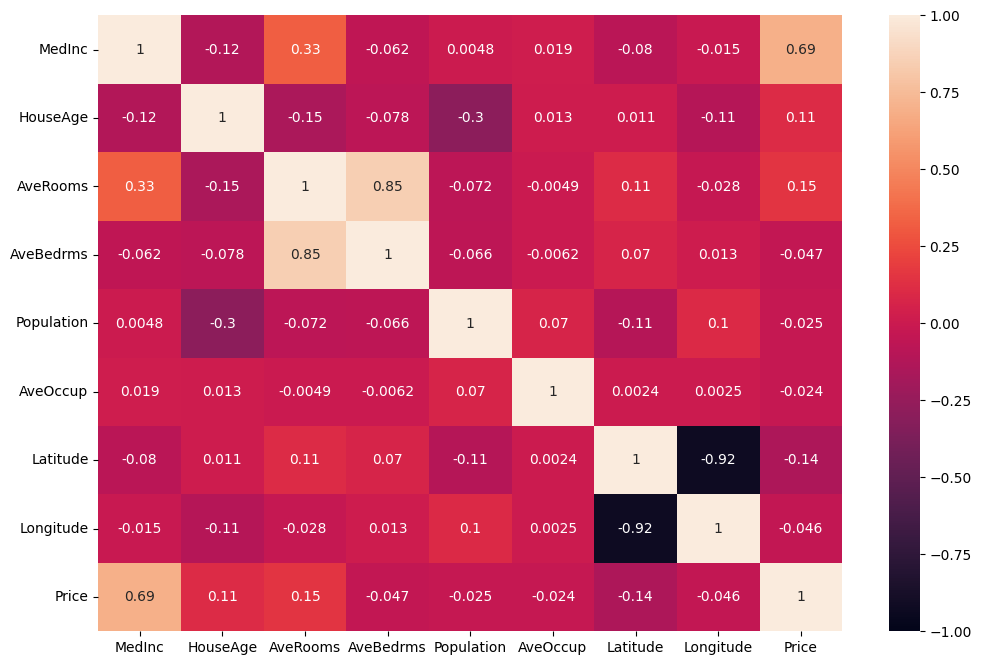

In [11]:
plt.figure(figsize=(12,8))

sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1)

<Figure size 1200x800 with 0 Axes>

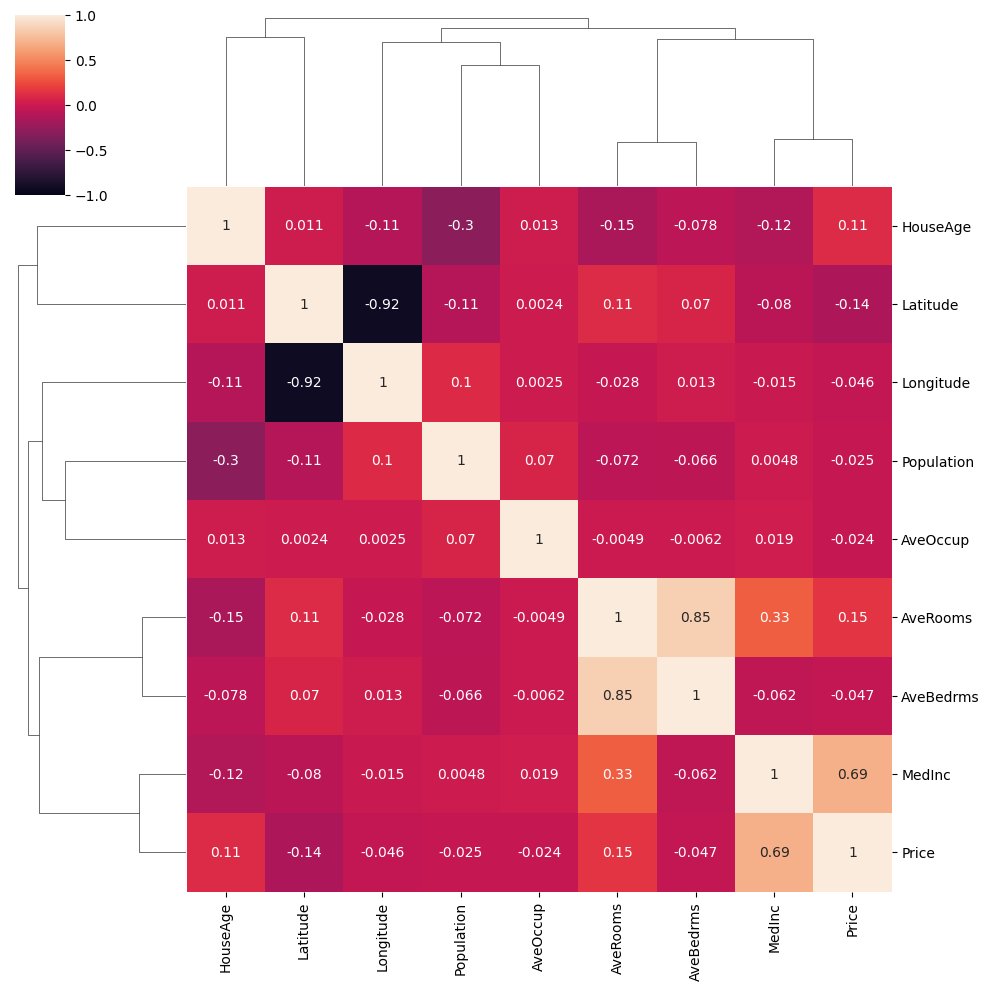

In [12]:
plt.figure(figsize=(12,8))

sns.clustermap(df.corr(),annot=True,vmax=1,vmin=-1)

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [16]:
vif=pd.DataFrame()

In [17]:
vif["feature"]=df.columns

In [18]:
vif

,feature
0,MedInc
1,HouseAge
2,AveRooms
3,AveBedrms
4,Population
5,AveOccup
6,Latitude
7,Longitude
8,Price


In [19]:
vif["VIF"]=[variance_inflation_factor(df.values,i) for i in range(len(df.columns))]

In [20]:
vif

,feature,VIF
0,MedInc,19.624998
1,HouseAge,7.592663
2,AveRooms,47.956351
3,AveBedrms,45.358192
4,Population,2.936078
5,AveOccup,1.099530
6,Latitude,568.497332
7,Longitude,640.064211
8,Price,9.285659


In [21]:
df1=df.copy()

In [23]:
df1.drop("Longitude",axis=1,inplace=True)

In [24]:
df1.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Price'],
      dtype='object')

In [28]:
vif=pd.DataFrame()
vif["feature"]=df1.columns
vif["VIF"]=[variance_inflation_factor(df1.values,i) for i in range(len(df1.columns))]

In [29]:
vif

,feature,VIF
0,MedInc,18.639889
1,HouseAge,7.346583
2,AveRooms,44.714760
3,AveBedrms,42.072000
4,Population,2.796280
5,AveOccup,1.099394
6,Latitude,22.873934
7,Price,9.193500


In [30]:
df1.drop("AveRooms",axis=1,inplace=True)

In [31]:
vif=pd.DataFrame()
vif["feature"]=df1.columns
vif["VIF"]=[variance_inflation_factor(df1.values,i) for i in range(len(df1.columns))]

In [32]:
vif

,feature,VIF
0,MedInc,10.584081
1,HouseAge,7.260588
2,AveBedrms,6.440667
3,Population,2.762794
4,AveOccup,1.098719
5,Latitude,22.094483
6,Price,8.674858


In [33]:
df1.drop("Latitude",axis=1,inplace=True)

In [34]:
vif=pd.DataFrame()
vif["feature"]=df1.columns
vif["VIF"]=[variance_inflation_factor(df1.values,i) for i in range(len(df1.columns))]

In [35]:
vif

,feature,VIF
0,MedInc,8.855104
1,HouseAge,4.156145
2,AveBedrms,4.264253
3,Population,2.223926
4,AveOccup,1.098671
5,Price,8.607339


# RFE

In [36]:
X=df.drop("Price",axis=1)
y=df.Price

In [37]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [38]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [40]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [43]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [44]:
rfe=RFE(estimator=LinearRegression(),n_features_to_select=5)


In [45]:
rfe

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [46]:
rfe.fit(X_train,Y_train)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [48]:
y_pred=rfe.predict(X_test)

In [49]:
y_pred

array([2.03611666, 0.84083939, 2.59261721, ..., 3.00698506, 2.48831132,
       1.21631066], shape=(4128,))

In [53]:
df.columns,rfe.support_

(Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
        'Latitude', 'Longitude', 'Price'],
       dtype='object'),
 array([ True, False,  True,  True, False, False,  True,  True]))